# MATH 210 Introduction to Mathematical Computing

## November 25, 2019

* Euler's 3-body problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

Write a function called `euler3body` which takes input parameters:

* `m1` is the mass of star 1
* `x1` is the position vector of star 1
* `m2` is the mass of star 2
* `x2` is the position vector of star 2
* `u0` is the initial values vector of the planet $[x(0),x'(0),y(0),y'(0)]$
* `tf` is the final time value
* `N` is the number of t values per year (default value `N=100`)

and plots the approximations $x(t)$ versus $y(t)$.

In [2]:
def euler3body(m1,x1,m2,x2,u0,tf,N=100):

    def odefun(u,t):
        G = 4*np.pi**2
        d1 = np.sqrt((u[0] - x1[0])**2 + (u[2] - x1[1])**2)
        d2 = np.sqrt((u[0] - x2[0])**2 + (u[2] - x2[1])**2)
        dudt = np.zeros(4)
        dudt[0] = u[1]
        dudt[1] = -G*(m1*(u[0] - x1[0])/d1**3 + m2*(u[0] - x2[0])/d2**3)
        dudt[2] = u[3]
        dudt[3] = -G*(m1*(u[2] - x1[1])/d1**3 + m2*(u[2] - x2[1])/d2**3)
        return dudt
    
    t = np.linspace(0,tf,100*tf)
    U = spi.odeint(odefun,u0,t)
    plt.plot(U[:,0],U[:,2])
    plt.plot(x1[0],x1[1],'r.',MarkerSize=m1*10)
    plt.plot(x2[0],x2[1],'r.',MarkerSize=m2*10)
    plt.axis('equal')
    plt.show()

Test the function with input where we know the output. We can model the orbit of the Earth around the Sun by setting $m_1=1$ and $m_2=0$ with Star 1 at the origin, and $\mathbf{u}_0=[1,0,0,2\pi]$ to start the planet at 1AU from the Sun and velocity $2\pi$ AU/year to produce a near circular orbit.

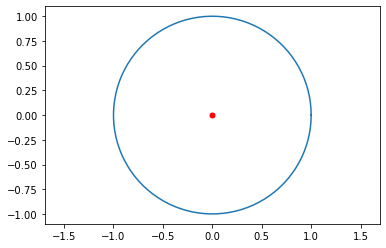

In [3]:
euler3body(1,[0,0],0,[0,0],[1,0,0,2*np.pi],1)

Success! Let's try to create some cool orbits!

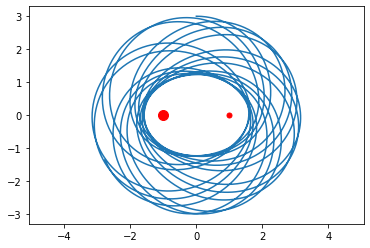

In [4]:
euler3body(2,[-1,0],1,[1,0],[0,5,3,0],30,200)

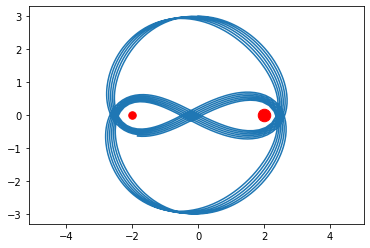

In [5]:
euler3body(1.5,[-2,0],2.5,[2,0],[0,4.8,3,0],20)

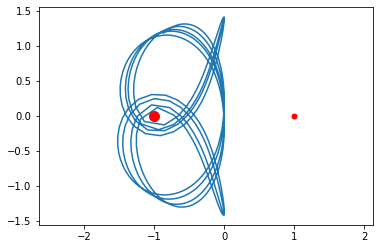

In [6]:
euler3body(2,[-1,0],1,[1,0],[0,0,0,10],6)

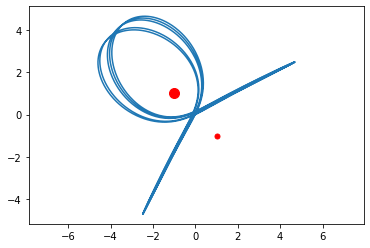

In [7]:
euler3body(2,[-1,1],1,[1,-1],[0,10,0,5],30)